<h1>Машинне навчання</h1>
<p>Ю.С. Процик. Курс лекцій</p>
<div align="right"><em>Cформовано на основі <a href="https://mlcourse.ai">відкритого курсу</a> Юрія Кашницького</em></div>

# Тема 1. Первинний аналіз даних з Pandas

### План

1. [Демонстрація основних методів Pandas](#1.-Демонстрація-основних-методів-Pandas)
2. [Перші спроби прогнозування](#2.-Перші-спроби-прогнозування)
3. [Корисні ресурси](#3.-Корисні-ресурси)

Задачі, які ставляться перед аналітиками даних та інженерами-дослідниками з машинного навчання, достатньо різноманітні. Однак все починається з даних. На практиці дані в "сирому" вигляді переважно малопридатні для аналізу. Процес підготовки і очищення даних (*препроцесінг*, англ. data preparation, pre-processing, data cleaning) може бути дуже трудомістким і займати більше часу, ніж побудова та перевірка моделей на основі даних. Виділимо деякі складові цього процесу:

- розуміння даних (data specification);
- редагування даних, виправлення помилок — ручне, автоматичне або їх комбінація (data editing);
- робота з пропущеними значеннями;
- нормалізація;
- створення та відбір ознак (feature extraction and selection).

**Об'єкти і ознаки** ([Математические методы обучения по прецедентам, К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf))

*Ознака* (feature) $f$ об'єкта $x$ — це результат вимірювання деякої характеристики об'єкта. Формально ознакою називається відображення $f: X \rightarrow D_f$, де $D_f$ — множина допустимих значень ознаки.

Залежно від природи множини $D_f$ ознаки діляться на кілька типів.
- Якщо $D_f = \{0, 1\}$, то $f$ — *бінарна* ознака;
- Якщо $D_f$ — скінченна невпорядкована множина, то $f$ — *категоріальна (номінальна)* ознака;
- Якщо $D_f$ — скінченна впорядкована множина, то $f$ — *порядкова* ознака;
- Якщо $D_f = \mathbb{R}$, то $f$ — *кількісна* ознака.

Якщо всі ознаки мають однаковий тип, $D_{f_1} = \cdots = D_{f_d}$, то вихідні дані називаються *однорідними*, в протилежному випадку — *різнорідними*.
Нехай маємо набір ознак $f_1,\ldots, f_d$. Вектор $(f_1(x),\ldots, f_d(x))$ називають *ознаковим описом* об'єкта $x\in X$. В подальшому ми не будемо розрізняти об'єкти з $X$ та їх ознакові описи, вважаючи $X = D_{f_1}\times\cdots\times D_{f_d}$. Сукупність ознакових описів всіх об'єктів вибірки $X^\ell$, записану у вигляді таблиці розміру $\ell\times d$, називають *матрицею об'єктів-ознак*:
$$
F = \left|\left|f_j(x_i)\right|\right|_{\ell\times d} = \left(\begin{array}{ccc}
f_1(x_1) & \ldots & f_d(x_1) \\
\ldots & \ldots & \ldots \\
f_1(x_\ell) & \ldots & f_d(x_\ell)
\end{array}
\right)
$$

## 1. Демонстрація основних методів Pandas
**[Pandas](http://pandas.pydata.org)** — це бібліотека Python, що надає широкі можливості для аналізу даних. З її допомогою дуже зручно завантажувати, обробляти і аналізувати табличні дані з використанням SQL-подібних запитів. У зв'язці з бібліотеками `Matplotlib` і `Seaborn` з'являється можливість зручного візуального аналізу табличних даних.

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)

Дані, з якими працюють аналітики та інженери-дослідники з машинного навчання, зазвичай зберігаються у вигляді таблиць — наприклад, у форматах `.csv`, `.tsv` або `.xlsx`. Для того, щоб зчитати потрібні дані з такого файлу, чудово підходить бібліотека Pandas.

Основними структурами даних в Pandas є класи `Series` і `DataFrame`. Перший з них є одновимірним індексованим масивом даних деякого фіксованого типу. Другий — це двовимірна структура даних, що представляє собою таблицю, кожен стовпець якої містить дані одного типу. Можна уявляти її як словник об'єктів типу `Series`. Структура `DataFrame` відмінно підходить для подання реальних даних: рядки відповідають описам ознак окремих об'єктів, а стовпці відповідають ознакам.

### Зчитування з файлу і попередній аналіз

Будемо демонструвати основні методи, аналізуючи набір даних по відтоку клієнтів телеком-оператора. Прочитаємо дані і подивимося на перші 5 рядків за допомогою методу `head`:

In [2]:
df = pd.read_csv('../data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<details>
<summary>Вивід датафреймів в Jupyter-ноутбуках</summary>
<p>

В Jupyter-ноутбуках датафрейми `Pandas` виводяться у вигляді красивих таблиць, і `print(df.head())` виглядає гірше.

За замовчуванням `Pandas` виводить всього 20 стовпців і 60 рядків. Якщо датафрейм є більшим, то потрібно скористатися функцією `set_option`:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Опис ознак

|        Назва              |                        Опис                        | Статистичний тип ознаки |
|:----------------------    |:-------------------------------------------------  |:----------              |
| **State**                 | Символьний код штату                               | Категоріальна           |
| **Account length**        | Як довго клієнт обслуговується компанією           | Кількісна               |
| **Area code**             | Префікс номера телефону                            | Категоріальна           |
| **International plan**    | Міжнародний роумінг (підключений / не підключений) | Бінарна                 |
| **Voice mail plan**       | Голосова пошта (підключена / не підключена)        | Бінарна                 |
| **Number vmail messages** | Кількість голосових повідомлень                    | Кількісна               |
| **Total day minutes**     | Загальна тривалість розмов вдень                   | Кількісна               |
| **Total day calls**       | Загальна кількість дзвінків вдень                  | Кількісна               |
| **Total day charge**      | Загальна сума оплати за послуги вдень              | Кількісна               |
| **Total eve minutes**     | Загальна тривалість розмов ввечері                 | Кількісна               |
| **Total eve calls**       | Загальна кількість дзвінків ввечері                | Кількісна               |
| **Total eve charge**      | Загальна сума оплати за послуги ввечері            | Кількісна               |
| **Total night minutes**   | Загальна тривалість розмов вночі                   | Кількісна               |
| **Total night calls**     | Загальна кількість дзвінків вночі                  | Кількісна               |
| **Total night charge**    | Загальна сума оплати за послуги вночі              | Кількісна               |
| **Total intl minutes**    | Загальна тривалість міжнародних розмов             | Кількісна               |
| **Total intl calls**      | Загальна кількість міжнародних розмов              | Кількісна               |
| **Total intl charge**     | Загальна сума оплати за міжнародні розмови         | Кількісна               |
| **Customer service calls**| Кількість звернень до сервісного центру            | Порядкова               |

Цільова змінна: **Churn** – ознака відтоку, бінарна ознака (Значення True – втрата клієнта, тобто відтік). Пізніше ми будемо будувати моделі, які прогнозують цю ознаку за іншими, тому і назвали її цільовою.

**Подивимося на розмір даних, назви ознак та їх типи**

In [3]:
print(df.shape)

(3333, 20)


Бачимо, що в таблиці 3333 рядки і 20 стовпців. Виведемо назви стовпців:

In [4]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


Щоб переглянути загальну інформацію для датафрейму та всіх ознак, скористаємося методом **`info`**:

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

`bool`, `int64`, `float64` и `object` — це типи ознак. Бачимо, що одна ознака — логічна (`bool`), 3 ознаки мають тип `object` і 16 ознак — числові.

**Змінити тип стовпця** можна за допомогою метода `astype`. Застосуємо цей метод до ознаки `Churn` і переведемо її в `int64`:

In [6]:
df['Churn'] = df['Churn'].astype('int64')

Метод **`describe`** виводить основні статистичні характеристики даних за кожною числовою ознакою (типи `int64` і `float64`): кількість непропущених значень, середнє, стандартне відхилення, діапазон, медіану, 0.25 і 0.75 квантилі.

In [7]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


Щоб переглянути статистику за нечисловими ознаками, потрібно явно вказати відповідний тип в параметрі `include`. Можна також задати `include`='all', щоб вивести статистику за всіма ознаками.

In [8]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Для категоріальних (тип `object`) та булевих (тип `bool`) ознак можна скористатися методом **`value_counts`**. Подивимося на розподіл цільової змінної — `Churn`:

In [9]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 користувачів з 3333 — лояльні, значення змінної `Churn` у них — `0`.

Подивимося на розподіл користувачів за змінною `Area code`. Вкажемо значення параметра `normalize=True`, щоб відобразити не абсолютні частоти, а відносні.

In [10]:
df['Area code'].value_counts(normalize=True)

415    0.50
510    0.25
408    0.25
Name: Area code, dtype: float64

### Сортування

`DataFrame` можна відсортувати за значенням якої-небудь ознаки. В нашому випадку, за `Total day charge` (`ascending=False` для сортування за спаданням):

In [11]:
df.sort_values(by='Total day charge', 
        ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


Сортувати можна і за групою стовпців:

In [12]:
df.sort_values(by=['Churn', 'Total day charge'],
        ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


### Індексація та отримання даних

`DataFrame` можна індексувати по-різному. У зв'язку з цим розглянемо різні способи індексації та отримання потрібних нам даних з датафрейма на прикладі простих запитань.

Для відбору окремого стовпця можна використовувати конструкцію виду `DataFrame['Name']`. Скористаємося цим для відповіді на запитання: **яка частка нелояльних користувачів в нашому датафреймі?**

In [13]:
df['Churn'].mean()

0.14491449144914492

14,5% — доволі поганий показник для компанії, з таким відсотком відтоку можна і збанкротувати.

Дуже зручною є логічна індексація `DataFrame` за одним стовпцем. Виглядає вона наступним чином: `df[P(df['Name'])]`, де `P` – це деяка логічна умова, що перевіряється для кожного елемента стовпця `Name`. Результатом такої індексації є `DataFrame`, що складається тільки з рядків, що задовольняють умову `P` за стовпцем `Name`.

Скористаємося цим для відповіді на запитання: **які середні значення числових ознак серед нелояльних користувачів?**

In [14]:
df[df['Churn'] == 1].mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

Скомбінувавши попередні два види індексації, дамо відповідь на запитання: **скільки в середньому протягом дня розмовляють по телефону нелояльні користувачі**?

In [15]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

**Яка максимальна тривалість міжнародних дзвінків серед лояльних користувачів (`'Churn' == 0`), що не користуються послугою міжнародного роумінгу (`'International plan' == 'No'`)?**

In [16]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

Датафрейми можна індексувати як за назвою стовпця або рядка, так і за порядковим номером. Для індексації **за назвою** використовується метод **`loc`**, **за номером** — **`iloc`**.

In [17]:
df.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [18]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


У першому випадку ми говоримо *«передай нам значення для id рядків від 0 до 5 і для стовпців від State до Area code»*, а в другому — *«передай нам значення перших п'яти рядків в перших трьох стовпцях»*.

У разі `iloc` зріз працює як зазвичай, проте у випадку `loc` враховуються і початок, і кінець зрізу.

Метод `ix` індексує і за назвою, і за номером, але він викликає плутанину, і тому був оголошений застарілим (deprecated).

Якщо нам потрібний перший або останній рядок датафрейму, користуємося конструкцією `df[:1]` або `df[-1:]`:

In [19]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


### Використання функцій: `apply`,` map` і ін.

**Застосування функції до кожного стовпця:**

In [20]:
df.apply(np.max) 

State                          WY
Account length                243
Area code                     510
International plan            Yes
Voice mail plan               Yes
Number vmail messages          51
Total day minutes         3.5e+02
Total day calls               165
Total day charge               60
Total eve minutes         3.6e+02
Total eve calls               170
Total eve charge               31
Total night minutes         4e+02
Total night calls             175
Total night charge             18
Total intl minutes             20
Total intl calls               20
Total intl charge             5.4
Customer service calls          9
Churn                           1
dtype: object

Метод `apply` можна використовувати і для того, щоб застосувати функцію до кожного рядка. Для цього потрібно вказати `axis = 1`.

**Застосування функції до кожної комірки стовпця**

Припустимо, з якоїсь причини нас цікавлять всі люди з штатів, назви яких починаються на 'W'. В даному випадку це можна зробити по-різному, але найбільшу свободу дає зв'язка `apply`-`lambda` – застосування функції до всіх значень в стовпці.

In [21]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


Метод `map` можна використовувати для **заміни значень в стовпці**, передавши йому в якості аргументу словник виду `{old_value: new_value}`:

In [22]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Аналогічну операцію можна реалізувати за допомогою методу `replace`:

In [23]:
df = df.replace({'Voice mail plan': d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Групування даних

У загальному випадку групування даних в Pandas виглядає наступним чином:

```
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. До датафрейму застосовується метод **`groupby`**, який розділяє дані по `grouping_columns` – ознаці або набору ознак.
2. Індексуємо за потрібними нам стовпцями (`columns_to_show`).
3. До отриманих груп застосовується функція або декілька функцій.

**Групування даних в залежності від значення ознаки `Churn` і вивід статистик за трьома стовпцями в кожній групі.**

In [24]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

Зробимо те ж саме, але трохи по-іншому, передавши в `agg` список функцій:

In [25]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

### Зведені таблиці

Припустимо, ми хочемо подивитися, як спостереження в нашій вибірці розподілені в контексті двох ознак — `Churn` і `International plan`. Для цього ми можемо побудувати **таблицю спряженості** (засіб представлення спільного розподілу двох змінних, призначений для дослідження зв'язку між ними), скориставшись методом **`crosstab`**:

In [26]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [27]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


Бачимо, що більшість користувачів — лояльні і не користуються додатковими послугами (міжнародного роумінгу / голосової пошти).

Просунуті користувачі `Excel` напевно згадають про таку річ, як **зведені таблиці** (`pivot tables`). В `Pandas` за зведені таблиці відповідає метод **`pivot_table`**, який приймає в якості параметрів:

* `values` – список змінних, за якими потрібно розрахувати потрібні статистики,
* `index` – список змінних, за якими потрібно згрупувати дані,
* `aggfunc` – те, що нам, власне, потрібно порахувати по групах – суму, середнє, максимум, мінімум або щось ще.

Давайте подивимося середню кількість денних, вечірніх і нічних дзвінків для різних `Area code`:

In [28]:
df.pivot_table(['Total day calls', 
                'Total eve calls', 
                'Total night calls'], ['Area code'], 
               aggfunc='mean').head(10)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


### Перетворення датафреймів

Як і багато інших речей, додавати стовпці в `DataFrame` можна декількома способами.

Наприклад, ми хочемо порахувати загальну кількість дзвінків для всіх користувачів. Створимо об'єкт `total_calls` типу `Series` і вставимо його в датафрейм:

In [29]:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value=total_calls) 
# loc - номер стовпця, після якого потрібно вставити даний Series
# вказуємо len(df.columns), щоб вставити його в кінець
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


Додати стовпець з наявних можна і простіше, не створюючи проміжних `Series`:

In [30]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


Щоб видалити стовпці або рядки, скористайтеся методом `drop`, передаючи в якості аргументу потрібні індекси і необхідне значення параметра `axis` (`1`, якщо видаляєте стовпці, і нічого або `0`, якщо видаляєте рядки):

In [31]:
# позбуваємося створених щойно стовпців
df = df.drop(['Total charge', 'Total calls'], axis=1) 

df.drop([1, 2]).head() # а ось так можна видалити рядки

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## 2. Перші спроби прогнозування

Подивимося, як відтік пов'язаний з ознакою *\"Підключення міжнародного роумінгу\"* (`International plan`). Зробимо це за допомогою таблиці спряженості `crosstab`, а також шляхом ілюстрації з `Seaborn` (як саме будувати такі рисунки і аналізувати з їх допомогою графіки – матеріал наступної лекції.)

In [32]:
# імпортуємо бібліотеки для побудови графіків
import matplotlib.pyplot as plt
# !pip install seaborn 
import seaborn as sns
# імпортуємо деякі налаштування візуалізації 
sns.set()
# графіки у форматі Retina виглядають більш чіткими
%config InlineBackend.figure_format = 'retina'

In [33]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


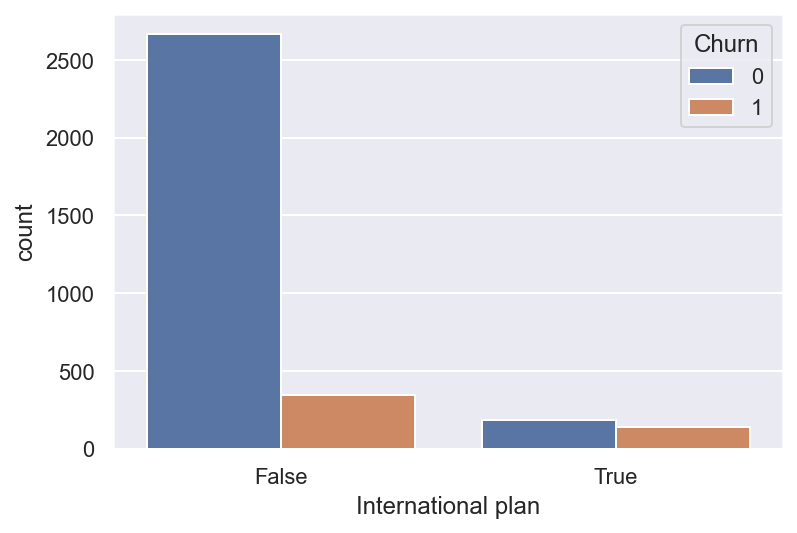

In [34]:
sns.countplot(x='International plan', hue='Churn', data=df);

Бачимо, що коли роумінг підключений, частка відтоку набагато вища. Можливо, великі і погано контрольовані витрати в роумінгу дуже конфліктогені і призводять до невдоволення клієнтів оператора і, відповідно, до їх відтоку.

Далі подивимося на ще одну важливу ознаку – *\"Кількість звернень до сервісного центру\"* (`Customer service calls`). Також побудуємо відповідну таблицю і рисунок.

In [35]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


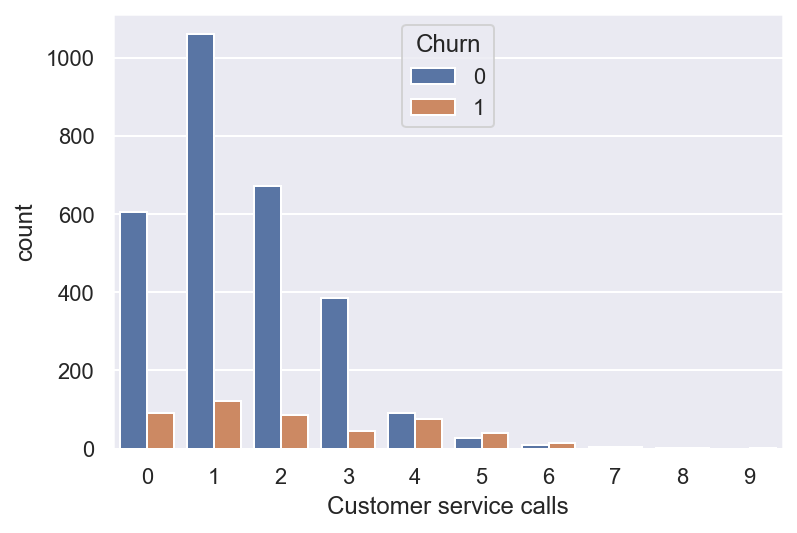

In [36]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

Можливо, по таблиці спряженості це не так добре видно, а ось рисунок свідчить про те, що частка відтоку сильно зростає починаючи з 4 дзвінків в сервісний центр.

Додамо тепер в наш DataFrame бінарну ознаку —  результат порівняння `Customer service calls > 3`. І ще раз подивимося, як вона пов'язана з відтоком.

In [37]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


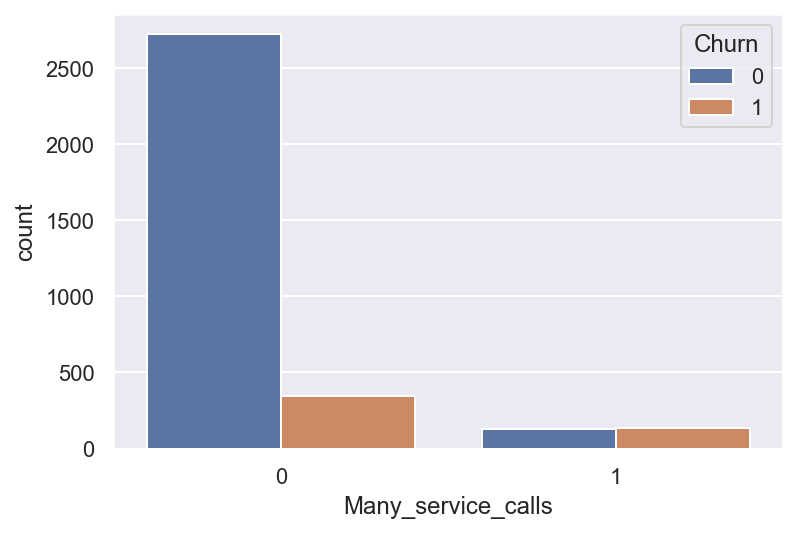

In [38]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);

Об'єднаємо розглянуті вище умови і побудуємо таблицю спряженості для цього об'єднання і відтоку.

In [39]:
pd.crosstab(df['Many_service_calls'] & df['International plan'] , 
            df['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Отже, прогнозуючи відтік клієнта в разі, коли кількість дзвінків в сервісний центр більша за 3 і підключений роумінг (і прогнозуючи лояльність – в іншому випадку), можна очікувати близько 85.8% правильних влучень (помиляємося всього 464 + 9 разів). Ці 85.8%, які ми отримали за допомогою дуже простих міркувань – це непогана відправна точка (*baseline*) для подальших моделей машинного навчання, які ми будемо будувати.

В цілому до появи машинного навчання процес аналізу даних виглядав приблизно так. Підсумуємо:
    
- Частка лояльних клієнтів у вибірці – 85.5%. Найбільш наївна модель, відповідь якої "Клієнт завжди лояльний" на подібних даних буде вгадувати приблизно у 85,5% випадків. Тобто частки правильних відповідей (*accuracy*) наступних моделей повинні бути як мінімум не менші, а краще, значно вищі за це значення.
- За допомогою простого прогнозу, який умовно можна виразити такою формулою: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", можна очікувати частку вгадувань 85.8%, що ще трохи вище 85.5%.
- Ці два результати ми отримали без всякого машинного навчання, і вони служать відправною точною для наших подальших моделей. Якщо виявиться, що ми величезними зусиллями збільшуємо частку правильних відповідей всього, скажімо, на 0.5%, то можливо, ми щось робимо не так, і досить обмежитися простою моделлю з двох умов.
- Перед навчанням складних моделей рекомендується трохи покрутити дані і перевірити прості припущення. Більше того, в бізнес-додатках машинного навчання найчастіше починають саме з простих рішень, а потім експериментують з їх ускладненням.

## 3. Корисні ресурси

* Офіційна [документація](http://pandas.pydata.org/pandas-docs/stable/index.html) Pandas.
* [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).
* [Pandas cheatsheet PDF](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf).
* [scipy-lectures.org](http://www.scipy-lectures.org/index.html) — Навчальні посібники по pandas, numpy, matplotlib і scikit-learn.